In [1]:
# -*- coding: utf-8 -*-
import torchvision
import torchvision.transforms as transforms
from Mnn_Core.mnn_pytorch import *
from cifar10_train import *
%matplotlib inline

D:\mnn\Mnn_Core\fast_dawson.py:217: RuntimeWarning: divide by zero encountered in true_divide
  y = -np.power((1/xx-1)*a, 1/alpha)


In [2]:
torch.set_default_tensor_type(torch.DoubleTensor)

In [3]:
EPOCHS = 10
BATCH_SIZE = 512

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(
    root='D:\Data_repos\Cifar10',
    train=True,
    download=False,
    transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=BATCH_SIZE, shuffle=True)

testset = torchvision.datasets.CIFAR10(
    root='D:\Data_repos\Cifar10',
    train=False,
    download=False,
    transform=transform
)

testloader = torch.utils.data.DataLoader(
    testset, batch_size=BATCH_SIZE, shuffle=True)

In [36]:
classic = torch.load("mnn_classic.pt")
classic.eval()

fc_net = torch.load("mnn_fc.pt")
fc_net.eval()

auto_encoder = torch.load("mnn_ae.pt")
auto_encoder.eval()

Mnn_Auto_Encoder(
  (encoder_layer1): Mnn_Layer_without_Rho(
    (fc): Mnn_Linear_without_Corr(in_features=3072, out_features=1024, bias=False)
    (bn_mean): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn_std): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (encoder_layer2): Mnn_Layer_without_Rho(
    (fc): Mnn_Linear_without_Corr(in_features=1024, out_features=500, bias=False)
    (bn_mean): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn_std): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (encoder_layer3): Mnn_Layer_without_Rho(
    (fc): Mnn_Linear_without_Corr(in_features=500, out_features=100, bias=False)
    (bn_mean): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn_std): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (decoder_layer1): 

In [7]:
images = trainset.data
labels = trainset.targets
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [11]:
sample_img = list()
sample_label = list()
for i in range(100):
    if labels[i] in sample_label:
        continue
    else:
        sample_img.append(images[i])
        sample_label.append(labels[i])
    if len(sample_label) == 10:
        break

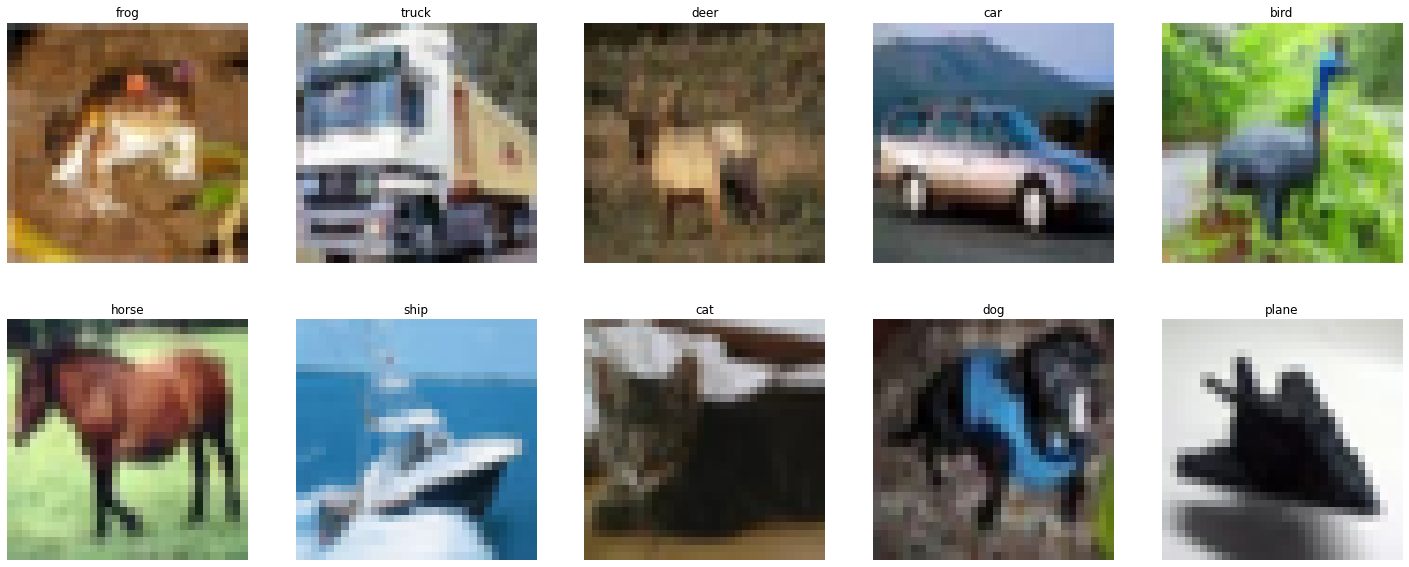

In [13]:
nrow = 2
ncol = 5
fig = plt.figure(figsize=(ncol*5, nrow*5))
for i in range(10):
    ax = fig.add_subplot(nrow, ncol, i+1)
    ax.imshow(sample_img[i])
    ax.set_title(classes[sample_label[i]])
    ax.axis(False)
plt.show()

In [62]:
def denormalise(x):
    x = x.clone().detach()
    x = x.permute(1,2,0)
    x = x*0.5 + 0.5
    return x

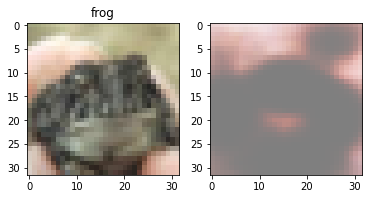

In [68]:
image, label = trainset[25]

ubar = image.clone().detach()
ubar = ubar.type(torch.float64)
ubar = ubar.view(-1, 3*32*32)
sbar = torch.sqrt(ubar)
encode = auto_encoder.forward(ubar, sbar)
encode = encode.view(3, 32, 32)

fig = plt.figure()
ax = fig.add_subplot(121)
ax.imshow(denormalise(image))
ax.set_title(classes[label])

ax = fig.add_subplot(122)
ax.imshow(denormalise(encode))

plt.show()

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

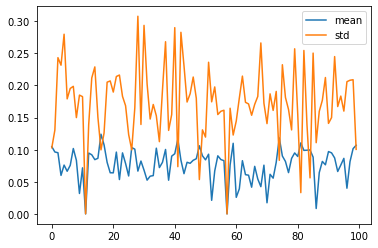

In [41]:
code1 = encode[0].clone().detach().view(-1)
code2 = encode[1].clone().detach().view(-1)
fig = plt.figure()
plt.plot(code1)
plt.plot(code2)
plt.legend(("mean", "std"))
plt.show()

In [48]:
ubar = trainset[0][0]
ubar = ubar.permute(1,2,0)

In [50]:
print(ubar*0.5 +0.5)

tensor([[[-0.5373, -0.5137, -0.5059],
         [-0.6627, -0.6392, -0.6471],
         [-0.6078, -0.6235, -0.6627],
         ...,
         [ 0.2392,  0.0353, -0.1529],
         [ 0.1922, -0.0196, -0.2000],
         [ 0.1608, -0.0275, -0.1922]],

        [[-0.8745, -0.8431, -0.8431],
         [-1.0000, -1.0000, -1.0000],
         [-0.8588, -0.9373, -1.0000],
         ...,
         [-0.0353, -0.3098, -0.5686],
         [-0.0667, -0.3490, -0.6078],
         [-0.0431, -0.3176, -0.5529]],

        [[-0.8039, -0.8118, -0.8353],
         [-0.8745, -0.9451, -1.0000],
         [-0.6157, -0.7882, -0.9373],
         ...,
         [-0.0745, -0.3412, -0.6078],
         [-0.0588, -0.3412, -0.6078],
         [-0.1451, -0.4275, -0.6706]],

        ...,

        [[ 0.6314,  0.3333, -0.2471],
         [ 0.5765,  0.2000, -0.7333],
         [ 0.5529,  0.2627, -0.7961],
         ...,
         [ 0.2549,  0.0431, -0.4510],
         [-0.5608, -0.7569, -0.9451],
         [-0.5843, -0.7333, -0.8431]],

        [[

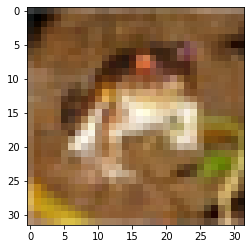

In [51]:
plt.imshow(ubar*0.5 +0.5)